# Demo for Lecture 8: Linear classification

This Jupyter notebook accompanies Lecture 8 of Computer Science in Mechanical Engineering II (CSME II).
By loading it in Jupyter or Jupyter Lab you can rerun it on your own and also modify it.

The following examples follow Sections 4.1.1 and 4.3.1 in
Christopher M. Bishop, Pattern Recognition and Machine Learning, 2006.

In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Here we use the apple and oranges dataset from Kaggle
https://www.kaggle.com/raykleptzo/classification-data-apples-oranges

In [2]:
data = pd.read_csv('apples_and_oranges.csv', delimiter=',', header=0)
classes = pd.get_dummies(data['Class'], prefix='Class')

## Least squares for classification
First, we use least squares for classification, see PRML Section 4.1.3 for details.
Very important: The following is used only for illustration purposes, in particular, we use the whole dataset
for training. 

In [3]:
xs_train = np.hstack([np.ones([data.shape[0], 1]), data[['Weight', 'Size']].to_numpy()])
ys_train = classes.to_numpy()

For simplicity we directly use the given features (weights and sizes) and we add a bias term.

In [4]:
X = xs_train
T = ys_train
W = la.solve(X.T @ X, X.T @ T)

Let's plot the dataset and the classification hyperplane from least squares.

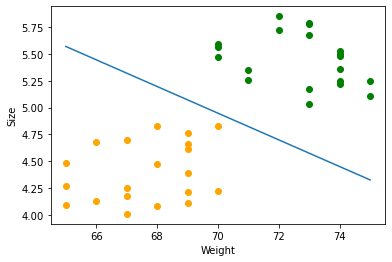

In [5]:
groups = data.groupby('Class')
for name, group in groups: 
    plt.plot(group['Weight'], group['Size'], marker='o', linestyle='', color='green' if name == 'apple' else name)
a = (W[1,1]-W[1,0])/(W[2,0]-W[2,1])
b = (W[0,1]-W[0,0])/(W[2,0]-W[2,1])
xs_plot = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
plt.plot(xs_plot, a*xs_plot+b)
plt.xlabel('Weight')
_ = plt.ylabel('Size')

## A problem with least squares for classification: Outlier
One problem of classification with least squares is its sensitivity to outliers. We modify the data set by adding
some oranges with features far off from the originals. 
As is clear from the plot, this should not make linear classification more difficult, since the two datasets are still
linearly separable.

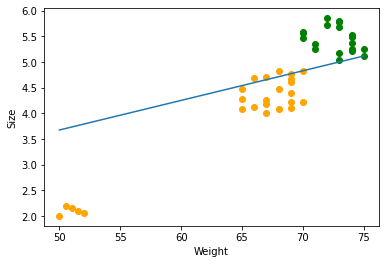

In [6]:
data_outlier = data.append(
    pd.DataFrame.from_dict({
        'Weight': [50, 50.5, 51, 51.5, 52], 
        'Size': [2, 2.2, 2.15, 2.1, 2.05], 
        'Class': ['orange']*5})
)
classes_outlier = pd.get_dummies(data_outlier['Class'], prefix='Class')

xs_train_outlier = np.hstack([np.ones([data_outlier.shape[0], 1]), data_outlier[['Weight', 'Size']].to_numpy()])
ys_train_outlier = classes_outlier.to_numpy()

X = xs_train_outlier
T = ys_train_outlier
W = la.solve(X.T @ X, X.T @ T)

groups = data_outlier.groupby('Class')
for name, group in groups: 
    plt.plot(group['Weight'], group['Size'], marker='o', linestyle='', color='green' if name == 'apple' else name)
a = (W[1,1]-W[1,0])/(W[2,0]-W[2,1])
b = (W[0,1]-W[0,0])/(W[2,0]-W[2,1])
xs_plot = np.linspace(data_outlier['Weight'].min(), data_outlier['Weight'].max(), 1000)
plt.plot(xs_plot, a*xs_plot+b)
plt.xlabel('Weight')
_ = plt.ylabel('Size')

-----

## Logistic regression for classification
We now use linear regression. Again, we directly use the given features and add a bias term.

In [7]:
xs_train = data[['Weight', 'Size']].to_numpy()
ys_train = data['Class'].astype('category').cat.codes.to_numpy()
lr_clf = LogisticRegression(penalty='none', random_state=0).fit(xs_train, ys_train)
w = np.vstack([ lr_clf.intercept_.reshape([1,1]), lr_clf.coef_.reshape([-1,1])])

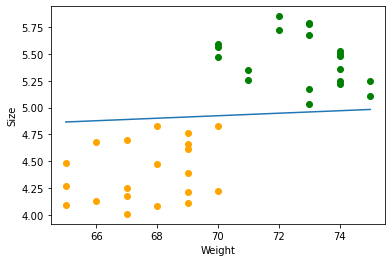

In [8]:
groups = data.groupby('Class')
for name, group in groups: 
    plt.plot(group['Weight'], group['Size'], marker='o', linestyle='', color='green' if name == 'apple' else name)
a = - w[1]/w[2]
b = - w[0]/w[2]
xs_plot = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
plt.plot(xs_plot, a*xs_plot+b)
plt.xlabel('Weight')
_ = plt.ylabel('Size')

## Logistic regression and outliers
How does logistic regression behave on the data set with outliers?

In [9]:
xs_train_outlier = data_outlier[['Weight', 'Size']].to_numpy()
ys_train_outlier = data_outlier['Class'].astype('category').cat.codes.to_numpy()
lr_clf = LogisticRegression(penalty='none', random_state=0).fit(xs_train_outlier, ys_train_outlier)
w = np.vstack([ lr_clf.intercept_.reshape([1,1]), lr_clf.coef_.reshape([-1,1])])

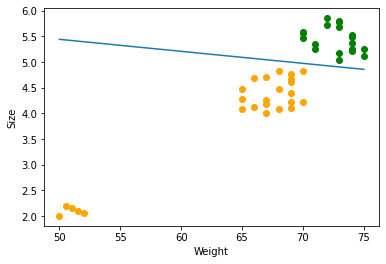

In [10]:
groups = data_outlier.groupby('Class')
for name, group in groups: 
    plt.plot(group['Weight'], group['Size'], marker='o', linestyle='', color='green' if name == 'apple' else name)
a = - w[1]/w[2]
b = - w[0]/w[2]
xs_plot = np.linspace(data_outlier['Weight'].min(), data_outlier['Weight'].max(), 1000)
plt.plot(xs_plot, a*xs_plot+b)
plt.xlabel('Weight')
_ = plt.ylabel('Size')

-----

## Logistic regression for data not linearly separable
We now construct an artificial dataset with two features and two classes. Note that the classes seem to be easily
separable.

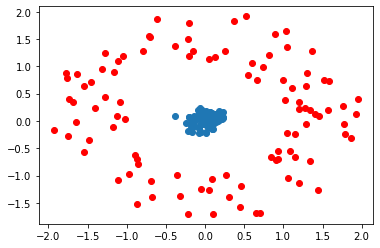

In [11]:
n1 = 100
n2 = 100
xs_train_1 = np.random.normal(scale=0.1, size=[n1,2])
plt.scatter(xs_train_1[:,0], xs_train_1[:,1])

thetas = np.random.uniform(0, 2*np.pi, n2)
rs = np.random.uniform(1,2, n2)
xs_train_2 = rs.reshape([-1,1])*np.hstack([np.cos(thetas.reshape([-1,1])), np.sin(thetas.reshape([-1,1]))])
plt.scatter(xs_train_2[:,0], xs_train_2[:,1], color='red')

xs_train = np.vstack([xs_train_1, xs_train_2])
ys_train = np.vstack([np.zeros([n1,1]), np.ones([n2, 1])])

As is clear from the plot, although the two classes should be easy to separate, this is not possible with a linear classifier.
To demonstrate this, let's use logistic regression again.

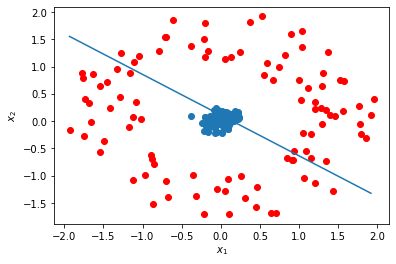

In [12]:
lr_clf = LogisticRegression(penalty='none', random_state=0).fit(xs_train, ys_train.flatten())
w = np.vstack([ lr_clf.intercept_.reshape([1,1]), lr_clf.coef_.reshape([-1,1])])

plt.scatter(xs_train_1[:,0], xs_train_1[:,1])
plt.scatter(xs_train_2[:,0], xs_train_2[:,1], color='red')

a = - w[1]/w[2]
b = - w[0]/w[2]
xs_plot = np.linspace(xs_train[:,0].min(), xs_train[:,1].max(), 1000)
plt.plot(xs_plot, a*xs_plot+b)
plt.xlabel('$x_1$')
_ = plt.ylabel('$x_2$')

However, adding a third feature, here the distance from the origin, makes the data linearly separable.

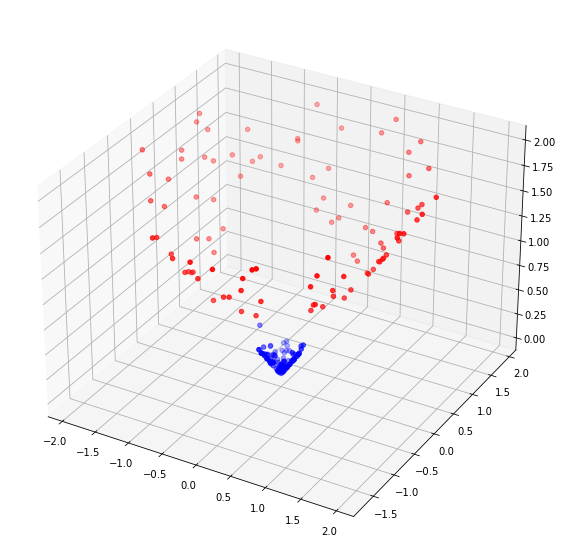

In [13]:
phi_train = np.hstack([xs_train, la.norm(xs_train, axis=1).reshape([-1,1])])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_train[:n1,0], phi_train[:n1,1], phi_train[:n1,2], color='b')
ax.scatter(phi_train[n1:,0], phi_train[n1:,1], phi_train[n1:,2], color='r')

Unsurprisingly, logistic regression has no problem finding a suitable classification hyperplane.

In [14]:
lr_clf = LogisticRegression(penalty='none', random_state=0).fit(phi_train, ys_train.flatten())
w = np.vstack([ lr_clf.intercept_.reshape([1,1]), lr_clf.coef_.reshape([-1,1])])

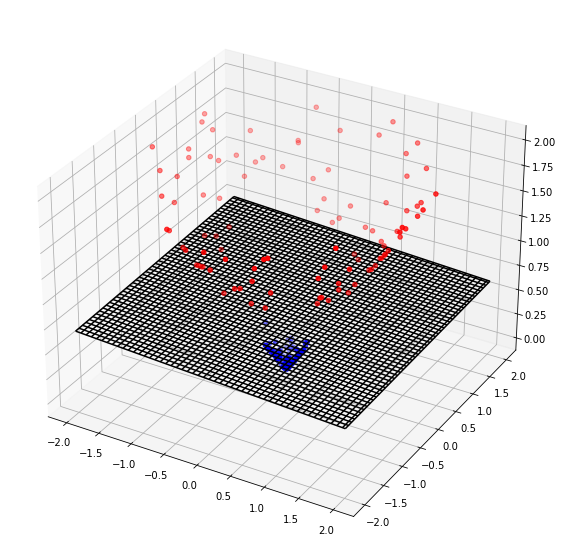

In [15]:
b = -w[0]/w[3]
a = -w[1:3]/w[3]
n_plot = 100
xs1 = np.repeat(np.linspace(-2,2,n_plot), n_plot)
xs2 = np.tile(np.linspace(-2,2,n_plot), n_plot)
xs = np.hstack([xs1.reshape([-1,1]), xs2.reshape([-1,1])])
ys = b + xs @ a.reshape([-1,1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xs1.reshape([n_plot,n_plot]), xs2.reshape([n_plot,n_plot]), ys.reshape([n_plot,n_plot]), color='k')
ax.scatter(phi_train[:n1,0], phi_train[:n1,1], phi_train[:n1,2], color='b')
ax.scatter(phi_train[n1:,0], phi_train[n1:,1], phi_train[n1:,2], color='r')